# **MATERIAL SELECTION FOR EV CHASSIS USING SUPERVISED ML ALGORITHMS:**

Attributes:

1. Material - Material name

2. Su - Ultimate Tensile Strength in MPa

3. Sy - Yield Strength in MPa

4. E - Elastic Modulus in MPa

5. G - Shear Modulus in MPa

6. mu - Poisson's Ratio in Units of Length

7. Ro - Density in Kg/m3

8. Use - Target (Whether we select the material for EV chasis)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the dataset
df = pd.read_csv("material.csv")
df.head()

,Material,Su,Sy,E,G,mu,Ro,Use
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.3,7860,True
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.3,7860,True
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.3,7860,True
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.3,7860,True
4,ANSI Steel SAE 1020 normalized,441,346,207000,79000,0.3,7860,True


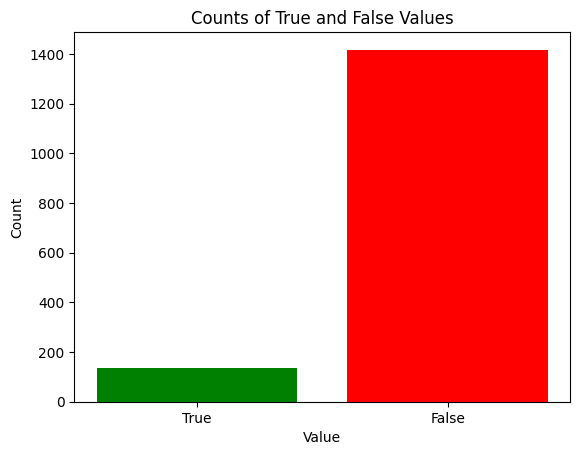

In [ ]:
# Calculate counts
true_count = df['Use'].sum()
false_count = len(df['Use']) - true_count

# Visualize counts
plt.bar(['True', 'False'], [true_count, false_count], color=['green', 'red'])
plt.title('Counts of True and False Values')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

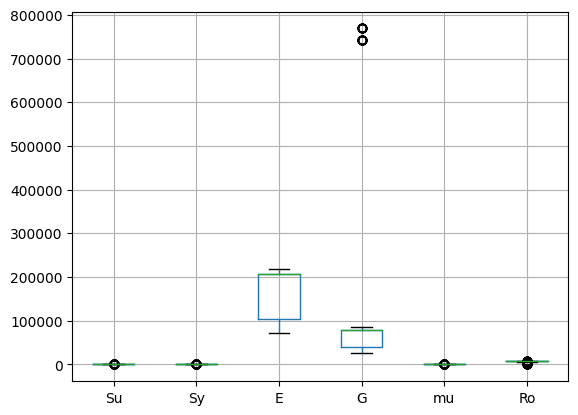

In [ ]:
# check for outliers in featurs
import matplotlib.pyplot as plt
cols = ['Su', 'Sy', 'E', 'G', 'mu', 'Ro']
df.boxplot(column=cols)
plt.show()

We use standard scalar because it scales data with o mean and 1 standard deviation
our dataset has not have varying ranges and we did not want to enforce a specific range so did not use minmax scalar
our data has almost no outlier in feature so we did not use robust scaling.

In [ ]:
# Data Pre-Processing
cols = ['Su', 'Sy', 'E', 'G', 'mu', 'Ro']
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

# Replace boolean 'Use' column with numerical values
df['Use'].replace([True, False], [1, 0], inplace=True)
df.describe()

,Su,Sy,E,G,mu,Ro,Use
count,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1552.000000
mean,-5.493887e-17,1.831296e-17,-1.831296e-16,-6.867359e-17,1.245281e-15,7.325183e-17,0.086985
std,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,0.281903
min,-1.541805e+00,-1.240579e+00,-1.631787e+00,-4.757007e-01,-4.189086e+00,-2.449689e+00,0.000000
25%,-7.123726e-01,-6.289464e-01,-1.061553e+00,-3.639568e-01,-1.210961e-01,1.088473e-01,0.000000
50%,-2.226710e-01,-2.833910e-01,7.382477e-01,-5.267004e-02,-1.210961e-01,4.398964e-01,0.000000
75%,4.047591e-01,2.867753e-01,7.382477e-01,-4.468833e-02,6.925018e-01,4.398964e-01,0.000000
max,5.041621e+00,5.739639e+00,9.699052e-01,5.454711e+00,1.912899e+00,9.459285e-01,1.000000


In [ ]:
# Split the data into features (X) and target (Y)
X = df.drop(['Material', 'Use'], axis=1)
Y = df['Use']

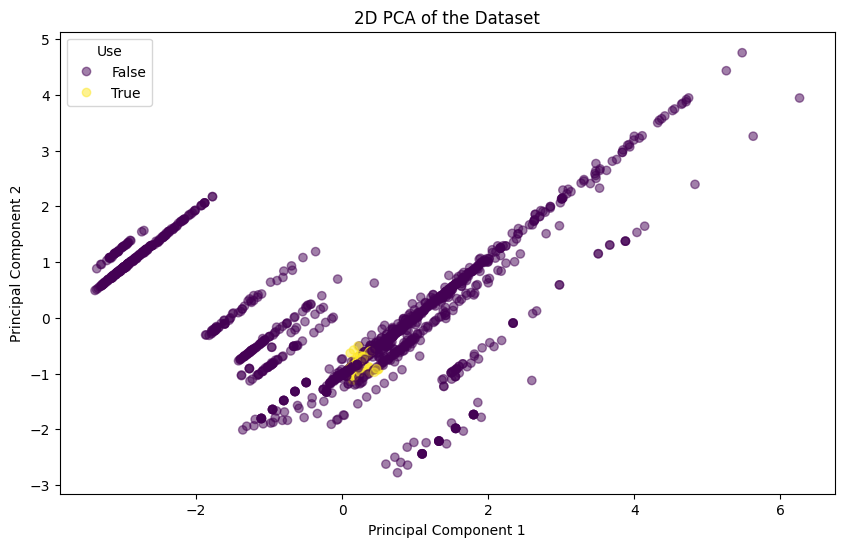

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Use'] = Y

# Plot 2D representation
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Use'], cmap='viridis', alpha=0.5)
plt.title('2D PCA of the Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
legend_labels = ['False', 'True']
plt.legend(handles=scatter.legend_elements()[0], title='Use', labels=legend_labels)

plt.show()


In [ ]:
# Train-test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X.head()

,Su,Sy,E,G,mu,Ro
0,-0.464461,-0.252291,0.756067,-0.05267,-0.121096,0.439896
1,-0.455279,-0.217736,0.756067,-0.05267,-0.121096,0.439896
2,-0.571583,-0.355958,0.756067,-0.05267,-0.121096,0.439896
3,-0.381824,-0.193547,0.756067,-0.05267,-0.121096,0.439896
4,-0.403248,-0.141713,0.756067,-0.05267,-0.121096,0.439896


In [ ]:
# Y is our target values
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Use, dtype: int64

# **ANN:**


Artificial Neural Network (ANN):
Accuracy: 0.9896907216494846
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       359
           1       0.93      0.93      0.93        29

    accuracy                           0.99       388
   macro avg       0.96      0.96      0.96       388
weighted avg       0.99      0.99      0.99       388

Confusion Matrix:


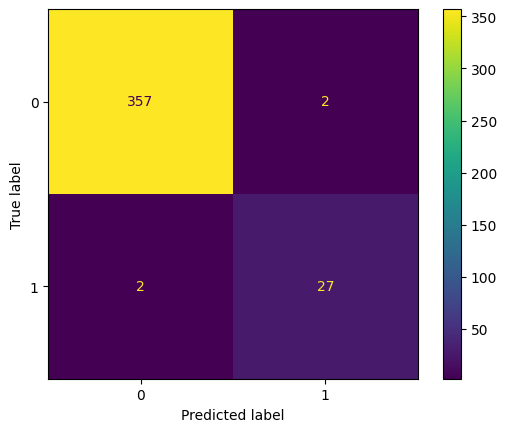

In [ ]:
# Train ANN
mlp_classifier = MLPClassifier(hidden_layer_sizes=(5), max_iter=500, activation='tanh', solver='lbfgs')
mlp_classifier.fit(X_train, Y_train)

# Evaluate ANN
Y_pred_ann = mlp_classifier.predict(X_test)
print("\nArtificial Neural Network (ANN):")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_ann))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_ann))
print("Confusion Matrix:")
cm_ann = confusion_matrix(Y_test, Y_pred_ann)
disp = ConfusionMatrixDisplay(cm_ann)
disp.plot()

Best Parameters for MLP:
{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}

Tuned MLP Classifier:
Accuracy: 0.9974226804123711
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       0.97      1.00      0.98        29

    accuracy                           1.00       388
   macro avg       0.98      1.00      0.99       388
weighted avg       1.00      1.00      1.00       388

Confusion Matrix:


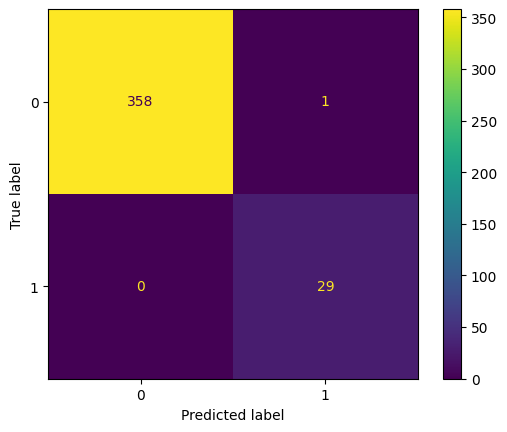

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(max_iter=500)

# Initialize GridSearchCV
grid_search = GridSearchCV(mlp_classifier, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)

# Print the best parameters
print("Best Parameters for MLP:")
print(grid_search.best_params_)

# Refit the model with the best parameters
best_mlp_classifier = grid_search.best_estimator_
best_mlp_classifier.fit(X_train_scaled, Y_train)

# Evaluate the tuned MLP model on the test set
Y_pred_mlp_tuned = best_mlp_classifier.predict(X_test_scaled)
print("\nTuned MLP Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_mlp_tuned))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_mlp_tuned))
print("Confusion Matrix:")
cm_mlp_tuned = confusion_matrix(Y_test, Y_pred_mlp_tuned)
disp_mlp_tuned = ConfusionMatrixDisplay(cm_mlp_tuned)
disp_mlp_tuned.plot()
plt.show()


# **SVM:**


Support Vector Machine (SVM):
Accuracy: 0.961340206185567
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       359
           1       0.77      0.69      0.73        29

    accuracy                           0.96       388
   macro avg       0.87      0.84      0.85       388
weighted avg       0.96      0.96      0.96       388

Confusion Matrix:


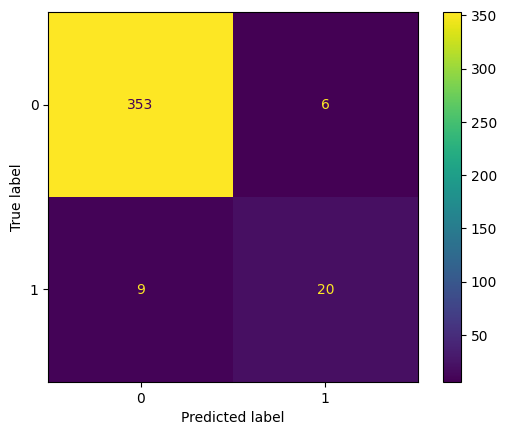

In [ ]:
# Train SVM
svm_classifier = svm.SVC(C=10, kernel='rbf')
svm_classifier.fit(X_train, Y_train)

# Evaluate SVM
Y_pred_svm = svm_classifier.predict(X_test)
print("\nSupport Vector Machine (SVM):")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_svm))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_svm))
print("Confusion Matrix:")
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
disp_svm = ConfusionMatrixDisplay(cm_svm)
disp_svm.plot()

Best Parameters for SVM:
{'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Tuned SVM Classifier:
Accuracy: 0.9871134020618557
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       359
           1       0.96      0.86      0.91        29

    accuracy                           0.99       388
   macro avg       0.98      0.93      0.95       388
weighted avg       0.99      0.99      0.99       388

Confusion Matrix:


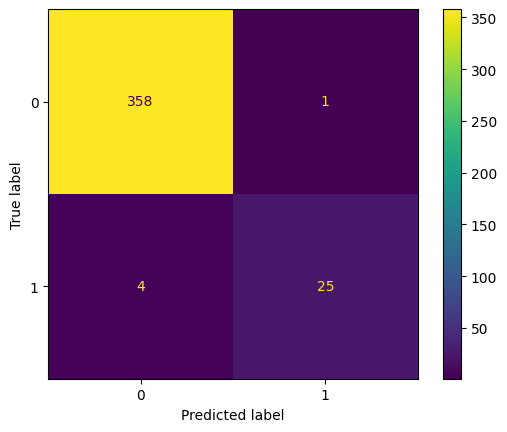

In [ ]:
# SVM parameter grid
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4]
}

# Initialize SVM classifier
svm_classifier_tuned = svm.SVC()

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(svm_classifier_tuned, svm_param_grid, scoring='accuracy', cv=5)
svm_grid_search.fit(X_train, Y_train)

# Print the best parameters
print("Best Parameters for SVM:")
print(svm_grid_search.best_params_)

# Refit the model with the best parameters
best_svm_classifier = svm_grid_search.best_estimator_
best_svm_classifier.fit(X_train, Y_train)

# Evaluate the tuned SVM model
Y_pred_svm_tuned = best_svm_classifier.predict(X_test)
print("Tuned SVM Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_svm_tuned))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_svm_tuned))
print("Confusion Matrix:")
cm_svm_tuned = confusion_matrix(Y_test, Y_pred_svm_tuned)
disp_svm_tuned = ConfusionMatrixDisplay(cm_svm_tuned)
disp_svm_tuned.plot()


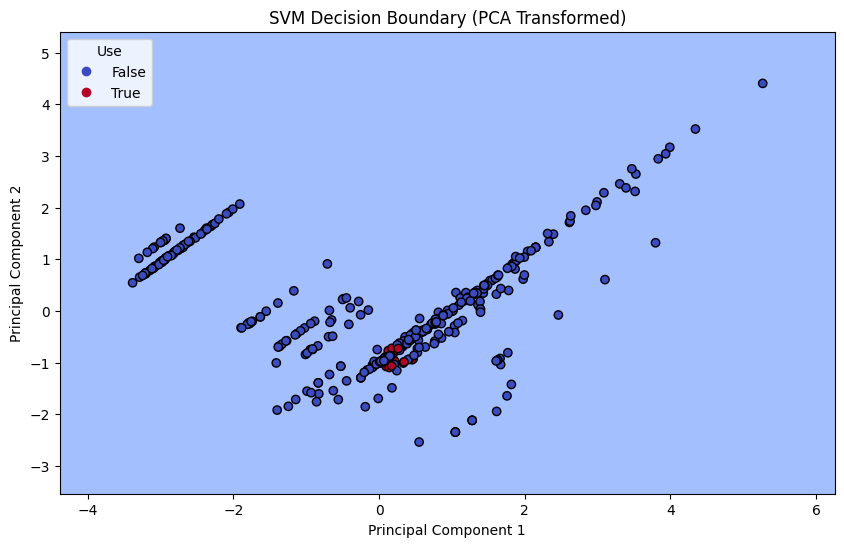

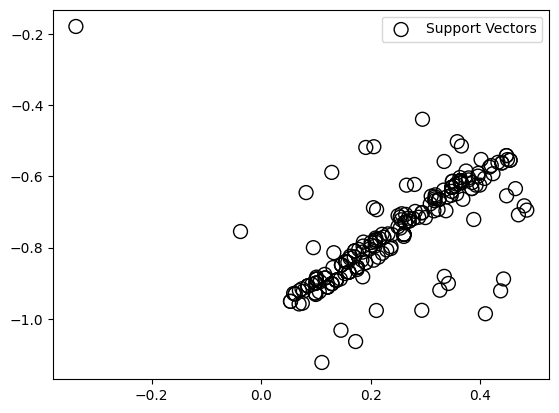

In [ ]:
# Apply PCA separately to training and test sets
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM on PCA-transformed training data
svm_classifier.fit(X_train_pca, Y_train)

# Visualize Decision Boundary for SVM on PCA-transformed data
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test_pca, Y_test, svm_classifier, 'SVM Decision Boundary (PCA Transformed)')

# Plot the support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.show()


# **DECISION TREE:**


Decision Tree:
Accuracy: 0.9974226804123711
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      0.97      0.98        29

    accuracy                           1.00       388
   macro avg       1.00      0.98      0.99       388
weighted avg       1.00      1.00      1.00       388

Confusion Matrix:


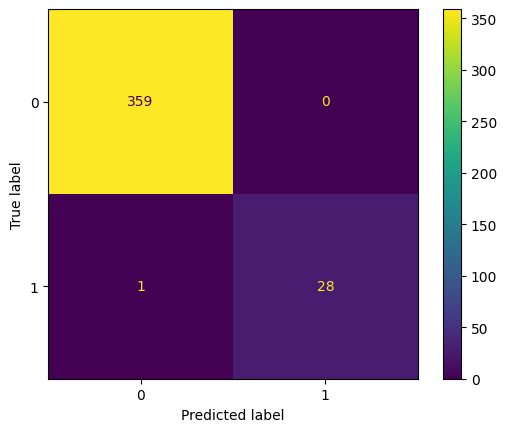

In [ ]:
# Train Decision Tree
dt_classifier = DecisionTreeClassifier(criterion='gini')
dt_classifier.fit(X_train, Y_train)

# Evaluate Decision Tree
Y_pred_dt = dt_classifier.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_dt))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_dt))
print("Confusion Matrix:")
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
disp_dt = ConfusionMatrixDisplay(cm_dt)
disp_dt.plot()

Best Parameters for Decision Tree:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree Classifier:
Accuracy: 0.9510309278350515
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       359
           1       0.66      0.72      0.69        29

    accuracy                           0.95       388
   macro avg       0.82      0.85      0.83       388
weighted avg       0.95      0.95      0.95       388

Confusion Matrix:


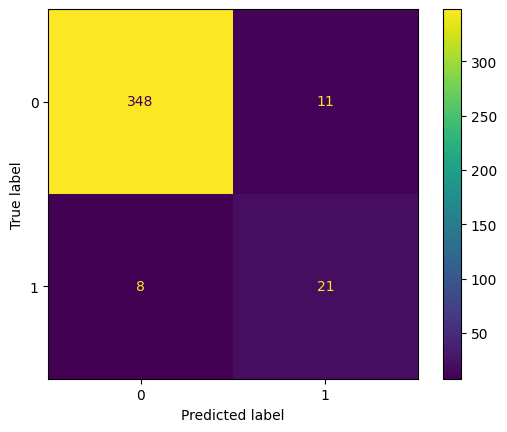

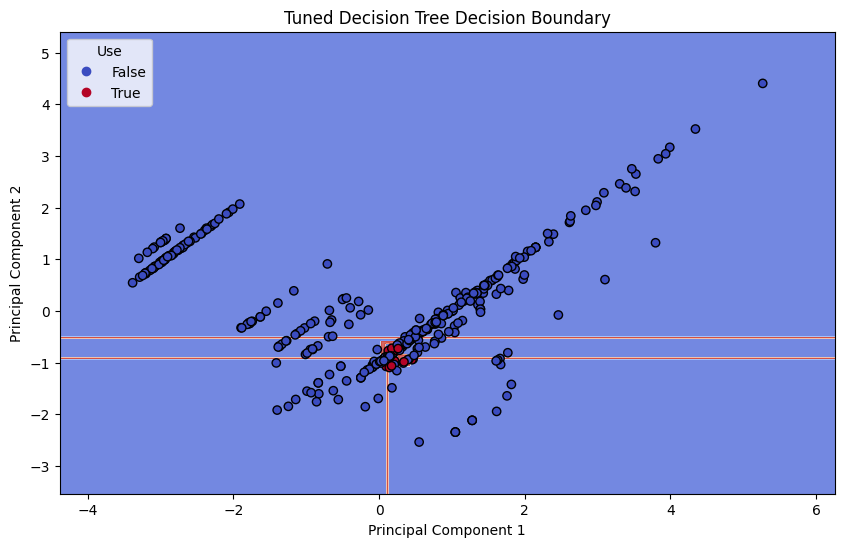

In [ ]:
# Parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_pca, Y_train)

# Print the best parameters
print("Best Parameters for Decision Tree:")
print(grid_search.best_params_)

# Refit the model with the best parameters
best_dt_classifier = grid_search.best_estimator_
best_dt_classifier.fit(X_train_pca, Y_train)

# Evaluate the tuned Decision Tree model
Y_pred_dt_tuned = best_dt_classifier.predict(X_test_pca)
print("Tuned Decision Tree Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_dt_tuned))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_dt_tuned))
print("Confusion Matrix:")
cm_dt_tuned = confusion_matrix(Y_test, Y_pred_dt_tuned)
disp_dt_tuned = ConfusionMatrixDisplay(cm_dt_tuned)
disp_dt_tuned.plot()

# Plot Decision Boundary for Tuned Decision Tree
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test_pca, Y_test, best_dt_classifier, 'Tuned Decision Tree Decision Boundary')

# **BAGGED TREES:**

Bagged Trees Classifier:
Accuracy: 0.9974226804123711
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      0.97      0.98        29

    accuracy                           1.00       388
   macro avg       1.00      0.98      0.99       388
weighted avg       1.00      1.00      1.00       388

Confusion Matrix:


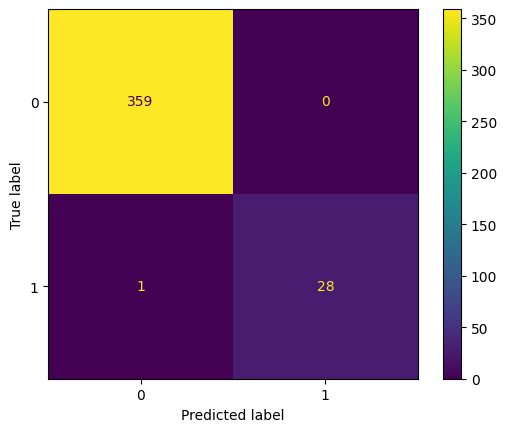

In [ ]:
# Train Bagged Trees
bt_classifier = BaggingClassifier(estimator = DecisionTreeClassifier())
bt_classifier.fit(X_train, Y_train)

# Evaluate Bagged Trees
Y_pred_bt = bt_classifier.predict(X_test)
print("Bagged Trees Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_bt))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_bt))
print("Confusion Matrix:")
cm_bt = confusion_matrix(Y_test, Y_pred_bt)
disp_bt = ConfusionMatrixDisplay(cm_bt)
disp_bt.plot()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_va

Best Parameters for Bagged Trees:
{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 20, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
Tuned Bagged Trees Classifier:
Accuracy: 0.9639175257731959
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       359
           1       0.74      0.79      0.77        29

    accuracy                           0.96       388
   macro avg       0.86      0.89      0.87       388
weighted avg       0.97      0.96      0.96       388

Confusion Matrix:


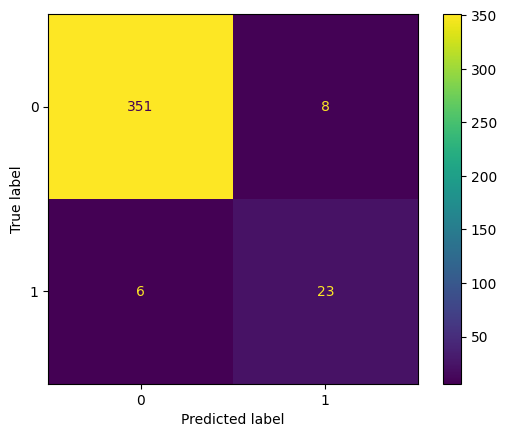

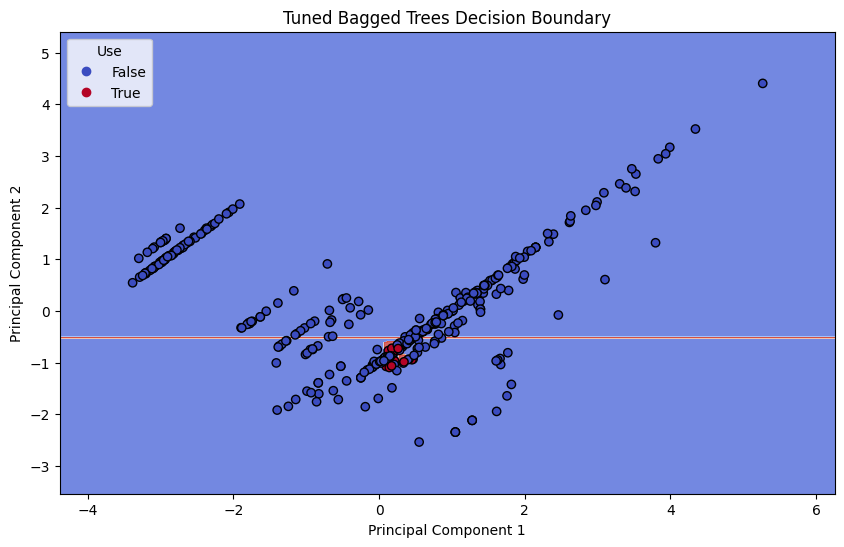

In [ ]:
# Parameter grid for Bagged Trees
bagged_trees_param_grid = {
    'base_estimator__criterion': ['gini', 'entropy'],
    'base_estimator__max_depth': [None, 10, 20, 30],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
}

# Initialize base Decision Tree classifier
base_dt_classifier = DecisionTreeClassifier()

# Initialize Bagged Trees classifier
bagged_trees_classifier = BaggingClassifier(base_dt_classifier)

# Initialize GridSearchCV for Bagged Trees
bagged_trees_grid_search = GridSearchCV(bagged_trees_classifier, bagged_trees_param_grid, scoring='accuracy', cv=5)
bagged_trees_grid_search.fit(X_train_pca, Y_train)

# Print the best parameters for Bagged Trees
print("Best Parameters for Bagged Trees:")
print(bagged_trees_grid_search.best_params_)

# Refit the Bagged Trees model with the best parameters
best_bagged_trees_classifier = bagged_trees_grid_search.best_estimator_
best_bagged_trees_classifier.fit(X_train_pca, Y_train)

# Evaluate the tuned Bagged Trees model
Y_pred_bagged_trees_tuned = best_bagged_trees_classifier.predict(X_test_pca)
print("Tuned Bagged Trees Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_bagged_trees_tuned))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_bagged_trees_tuned))
print("Confusion Matrix:")
cm_bagged_trees_tuned = confusion_matrix(Y_test, Y_pred_bagged_trees_tuned)
disp_bagged_trees_tuned = ConfusionMatrixDisplay(cm_bagged_trees_tuned)
disp_bagged_trees_tuned.plot()

# Plot Decision Boundary for Tuned Bagged Trees
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test_pca, Y_test, best_bagged_trees_classifier, 'Tuned Bagged Trees Decision Boundary')

# **RANDOM FOREST:**

Random Forest Classifier:
Accuracy: 0.9974226804123711
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      0.97      0.98        29

    accuracy                           1.00       388
   macro avg       1.00      0.98      0.99       388
weighted avg       1.00      1.00      1.00       388

Confusion Matrix:


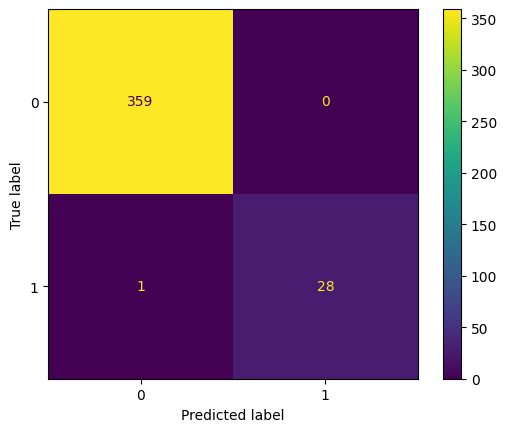

In [ ]:
# Train Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)

# Evaluate Random Forest
Y_pred_rf = rf_classifier.predict(X_test)
print("Random Forest Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_rf))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf))
print("Confusion Matrix:")
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf)
disp_rf.plot()

Best Parameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Random Forest Classifier:
Accuracy: 0.9974226804123711
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      0.97      0.98        29

    accuracy                           1.00       388
   macro avg       1.00      0.98      0.99       388
weighted avg       1.00      1.00      1.00       388

Confusion Matrix:


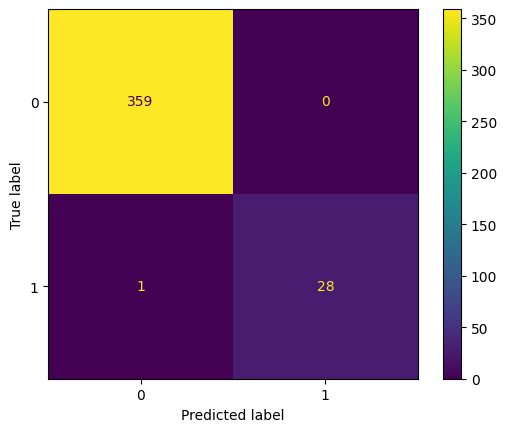

In [ ]:
# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier_tuned = RandomForestClassifier()

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(rf_classifier_tuned, rf_param_grid, scoring='accuracy', cv=5)
rf_grid_search.fit(X_train, Y_train)

# Print the best parameters
print("Best Parameters for Random Forest:")
print(rf_grid_search.best_params_)

# Refit the model with the best parameters
best_rf_classifier = rf_grid_search.best_estimator_
best_rf_classifier.fit(X_train, Y_train)

# Evaluate the tuned Random Forest model
Y_pred_rf_tuned = best_rf_classifier.predict(X_test)
print("Tuned Random Forest Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_rf_tuned))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf_tuned))
print("Confusion Matrix:")
cm_rf_tuned = confusion_matrix(Y_test, Y_pred_rf_tuned)
disp_rf_tuned = ConfusionMatrixDisplay(cm_rf_tuned)
disp_rf_tuned.plot()


# **DECISION TREE WITH ADABOOST:**


Decision Tree with AdaBoost:
Accuracy: 0.9974226804123711
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      0.97      0.98        29

    accuracy                           1.00       388
   macro avg       1.00      0.98      0.99       388
weighted avg       1.00      1.00      1.00       388

Confusion Matrix:


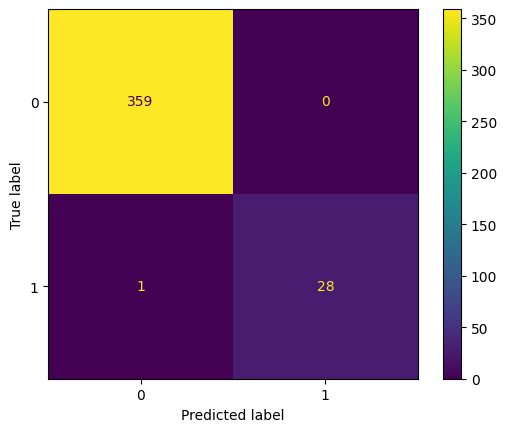

In [ ]:
# Train Decision Tree with AdaBoost
base_classifier = DecisionTreeClassifier()

# Create AdaBoost classifier with the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, Y_train)

# Evaluate AdaBoost with Decision Tree
Y_pred_adaboost = adaboost_classifier.predict(X_test)
print("\nDecision Tree with AdaBoost:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_adaboost))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_adaboost))
print("Confusion Matrix:")
cm_adaboost = confusion_matrix(Y_test, Y_pred_adaboost)
disp_adaboost = ConfusionMatrixDisplay(cm_adaboost)
disp_adaboost.plot()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selecti

Best Parameters for Decision Tree with AdaBoost:
{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 30, 'base_estimator__min_samples_leaf': 4, 'base_estimator__min_samples_split': 5, 'learning_rate': 1, 'n_estimators': 50}
Tuned Decision Tree with AdaBoost Classifier:
Accuracy: 0.9690721649484536
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       359
           1       0.77      0.83      0.80        29

    accuracy                           0.97       388
   macro avg       0.88      0.90      0.89       388
weighted avg       0.97      0.97      0.97       388

Confusion Matrix:


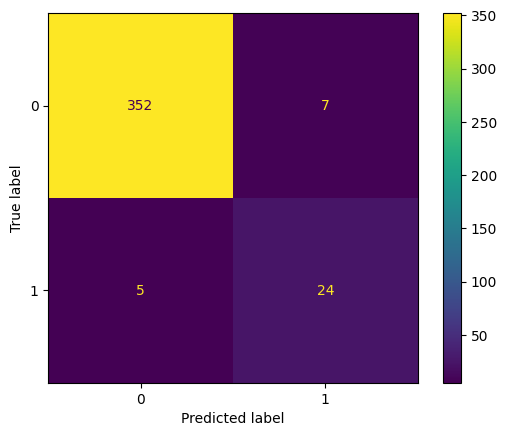

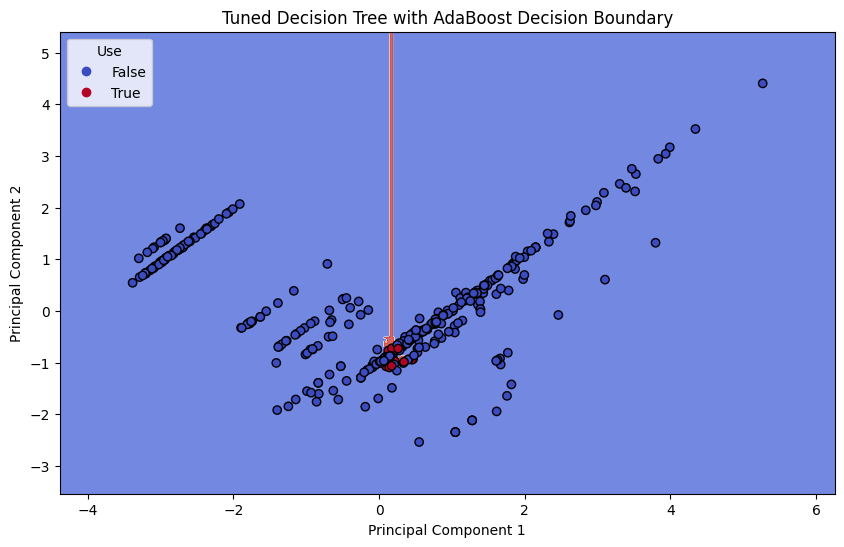

In [ ]:
# Parameter grid for Decision Tree with AdaBoost
adaboost_param_grid = {
    'base_estimator__criterion': ['gini', 'entropy'],
    'base_estimator__max_depth': [None, 10, 20, 30],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1],
}

# Initialize base Decision Tree classifier
base_dt_classifier = DecisionTreeClassifier()

# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_dt_classifier)

# Initialize GridSearchCV for AdaBoost
adaboost_grid_search = GridSearchCV(adaboost_classifier, adaboost_param_grid, scoring='accuracy', cv=5)
adaboost_grid_search.fit(X_train_pca, Y_train)

# Print the best parameters for AdaBoost
print("Best Parameters for Decision Tree with AdaBoost:")
print(adaboost_grid_search.best_params_)

# Refit the AdaBoost model with the best parameters
best_adaboost_classifier = adaboost_grid_search.best_estimator_
best_adaboost_classifier.fit(X_train_pca, Y_train)

# Evaluate the tuned AdaBoost model
Y_pred_adaboost_tuned = best_adaboost_classifier.predict(X_test_pca)
print("Tuned Decision Tree with AdaBoost Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_adaboost_tuned))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_adaboost_tuned))
print("Confusion Matrix:")
cm_adaboost_tuned = confusion_matrix(Y_test, Y_pred_adaboost_tuned)
disp_adaboost_tuned = ConfusionMatrixDisplay(cm_adaboost_tuned)
disp_adaboost_tuned.plot()

# Plot Decision Boundary for Tuned Decision Tree with AdaBoost
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test_pca, Y_test, best_adaboost_classifier, 'Tuned Decision Tree with AdaBoost Decision Boundary')

# **KNN:**


K-Nearest Neighbors (KNN):
Accuracy: 0.9819587628865979
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       359
           1       0.87      0.90      0.88        29

    accuracy                           0.98       388
   macro avg       0.93      0.94      0.94       388
weighted avg       0.98      0.98      0.98       388

Confusion Matrix:


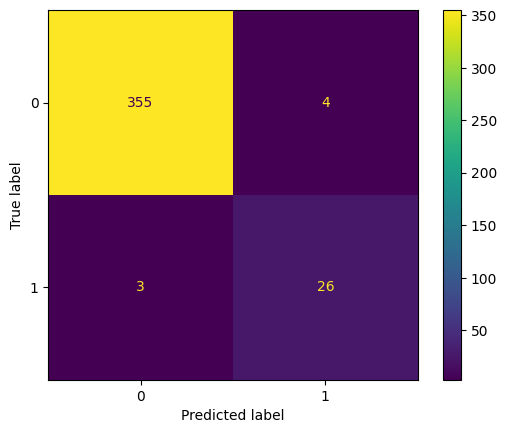

In [ ]:
# Train K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, Y_train)

# Evaluate KNN
Y_pred_knn = knn_classifier.predict(X_test)
print("\nK-Nearest Neighbors (KNN):")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_knn))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_knn))
print("Confusion Matrix:")
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
disp_knn = ConfusionMatrixDisplay(cm_knn)
disp_knn.plot()

Best Parameters for KNN:
{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

Tuned KNN Classifier:
Accuracy: 0.9896907216494846
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       359
           1       0.96      0.90      0.93        29

    accuracy                           0.99       388
   macro avg       0.98      0.95      0.96       388
weighted avg       0.99      0.99      0.99       388

Confusion Matrix:


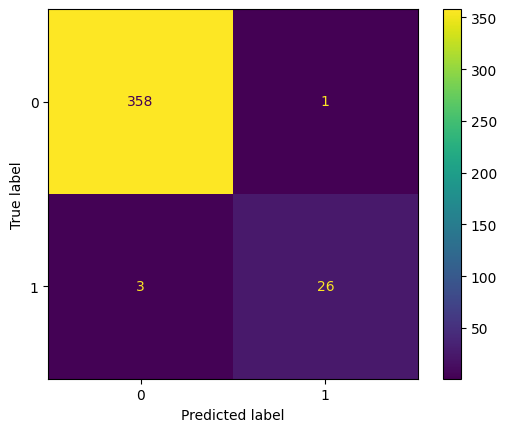

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)

# Print the best parameters
print("Best Parameters for KNN:")
print(grid_search.best_params_)

# Refit the model with the best parameters
best_knn_classifier = grid_search.best_estimator_
best_knn_classifier.fit(X_train_scaled, Y_train)

# Evaluate the tuned KNN model on the test set
Y_pred_knn_tuned = best_knn_classifier.predict(X_test_scaled)
print("\nTuned KNN Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_knn_tuned))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_knn_tuned))
print("Confusion Matrix:")
cm_knn_tuned = confusion_matrix(Y_test, Y_pred_knn_tuned)
disp_knn_tuned = ConfusionMatrixDisplay(cm_knn_tuned)
disp_knn_tuned.plot()
plt.show()


# **NAIVE BAYES:**


Naive Bayes:
Accuracy: 0.8427835051546392
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       359
           1       0.31      0.93      0.47        29

    accuracy                           0.84       388
   macro avg       0.65      0.88      0.69       388
weighted avg       0.94      0.84      0.87       388

Confusion Matrix:


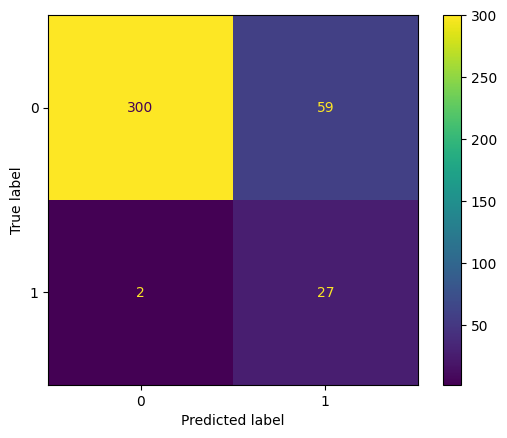

In [ ]:
# Train Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

# Evaluate Naive Bayes
Y_pred_nb = nb_classifier.predict(X_test)
print("\nNaive Bayes:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_nb))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_nb))
print("Confusion Matrix:")
cm_nb = confusion_matrix(Y_test, Y_pred_nb)
disp_nb = ConfusionMatrixDisplay(cm_nb)
disp_nb.plot()

Best Parameters for Naive Bayes:
{'var_smoothing': 1e-09}
Tuned Naive Bayes Classifier:
Accuracy: 0.9123711340206185
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       359
           1       0.45      0.83      0.59        29

    accuracy                           0.91       388
   macro avg       0.72      0.87      0.77       388
weighted avg       0.95      0.91      0.92       388

Confusion Matrix:


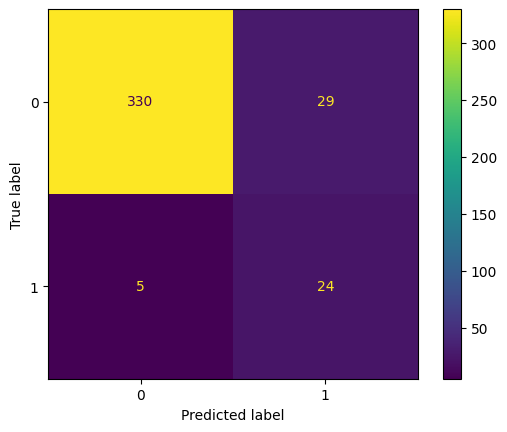

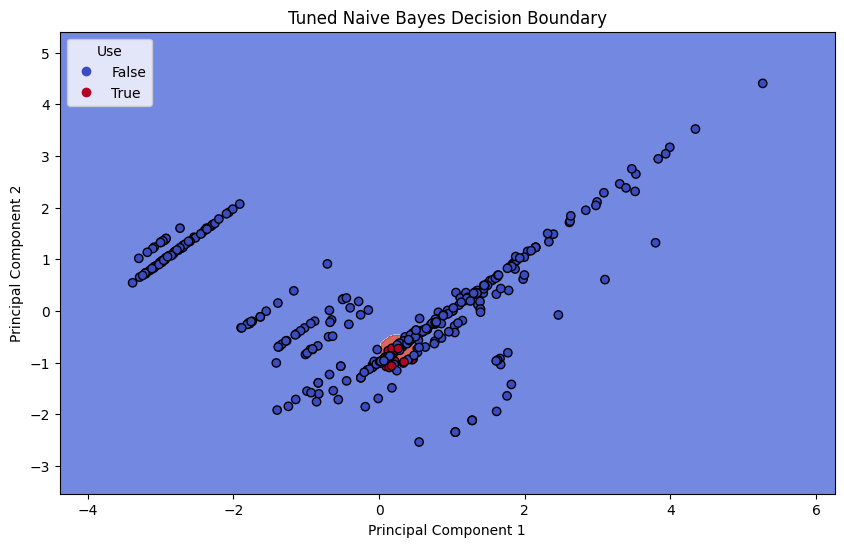

In [ ]:
# Parameter grid for Naive Bayes
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
}

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Initialize GridSearchCV for Naive Bayes
nb_grid_search = GridSearchCV(nb_classifier, nb_param_grid, scoring='accuracy', cv=5)
nb_grid_search.fit(X_train_pca, Y_train)

# Print the best parameters for Naive Bayes
print("Best Parameters for Naive Bayes:")
print(nb_grid_search.best_params_)

# Refit the Naive Bayes model with the best parameters
best_nb_classifier = nb_grid_search.best_estimator_
best_nb_classifier.fit(X_train_pca, Y_train)

# Evaluate the tuned Naive Bayes model
Y_pred_nb_tuned = best_nb_classifier.predict(X_test_pca)
print("Tuned Naive Bayes Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_nb_tuned))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_nb_tuned))
print("Confusion Matrix:")
cm_nb_tuned = confusion_matrix(Y_test, Y_pred_nb_tuned)
disp_nb_tuned = ConfusionMatrixDisplay(cm_nb_tuned)
disp_nb_tuned.plot()

# Plot Decision Boundary for Tuned Naive Bayes
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test_pca, Y_test, best_nb_classifier, 'Tuned Naive Bayes Decision Boundary')

# **LOGISTIC REGRESSION:**


Logistic Regression:
Accuracy: 0.884020618556701
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       359
           1       0.39      0.93      0.55        29

    accuracy                           0.88       388
   macro avg       0.69      0.91      0.74       388
weighted avg       0.95      0.88      0.90       388

Confusion Matrix:


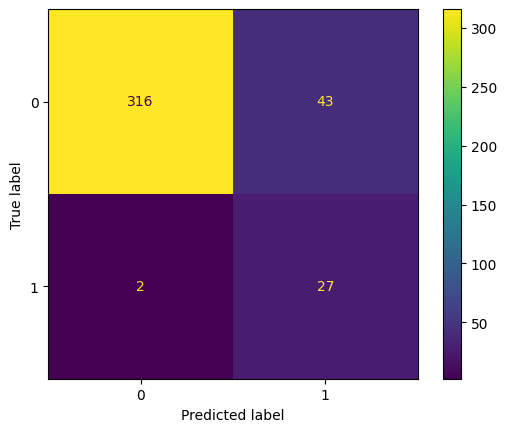

In [ ]:
# Train Logistic Regression
lr_classifier = LogisticRegression(penalty=None, solver='lbfgs', max_iter=200, class_weight='balanced')
lr_classifier.fit(X_train, Y_train)

# Evaluate Logistic Regression
Y_pred_lr = lr_classifier.predict(X_test)
print("\nLogistic Regression:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_lr))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_lr))
print("Confusion Matrix:")
cm_lr = confusion_matrix(Y_test, Y_pred_lr)
disp_lr = ConfusionMatrixDisplay(cm_lr)
disp_lr.plot()

Best Parameters for Logistic Regression:
{'C': 0.001, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Tuned Logistic Regression Classifier:
Accuracy: 0.9252577319587629
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       359
           1       0.00      0.00      0.00        29

    accuracy                           0.93       388
   macro avg       0.46      0.50      0.48       388
weighted avg       0.86      0.93      0.89       388

Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

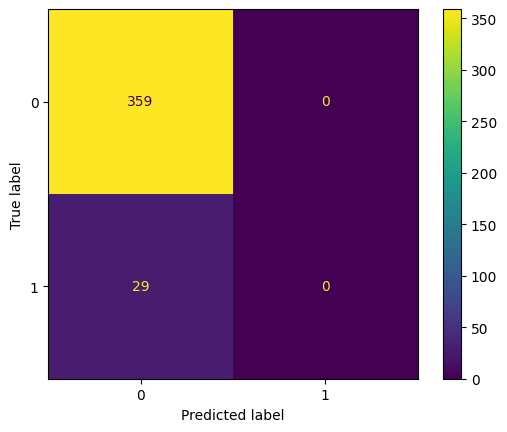

In [ ]:
# Logistic Regression parameter grid
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

# Initialize Logistic Regression classifier
lr_classifier_tuned = LogisticRegression()

# Initialize GridSearchCV
lr_grid_search = GridSearchCV(lr_classifier_tuned, lr_param_grid, scoring='accuracy', cv=5)
lr_grid_search.fit(X_train, Y_train)

# Print the best parameters
print("Best Parameters for Logistic Regression:")
print(lr_grid_search.best_params_)

# Refit the model with the best parameters
best_lr_classifier = lr_grid_search.best_estimator_
best_lr_classifier.fit(X_train, Y_train)

# Evaluate the tuned Logistic Regression model
Y_pred_lr_tuned = best_lr_classifier.predict(X_test)
print("\nTuned Logistic Regression Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_lr_tuned))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_lr_tuned))
print("Confusion Matrix:")
cm_lr_tuned = confusion_matrix(Y_test, Y_pred_lr_tuned)
disp_lr_tuned = ConfusionMatrixDisplay(cm_lr_tuned)
disp_lr_tuned.plot()

# **ROC CURVES:**

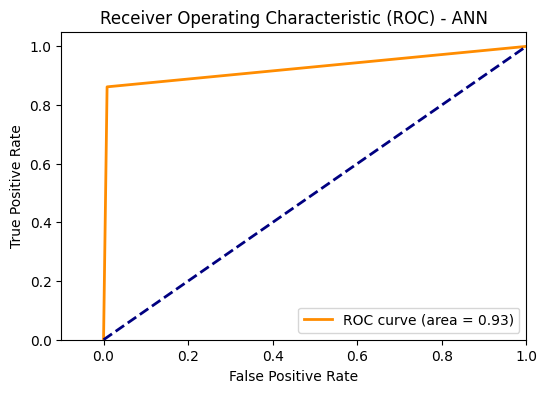

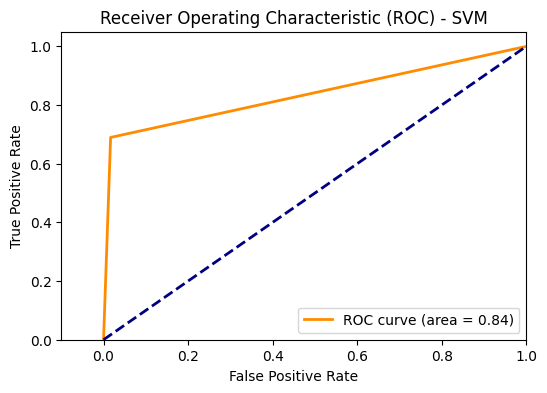

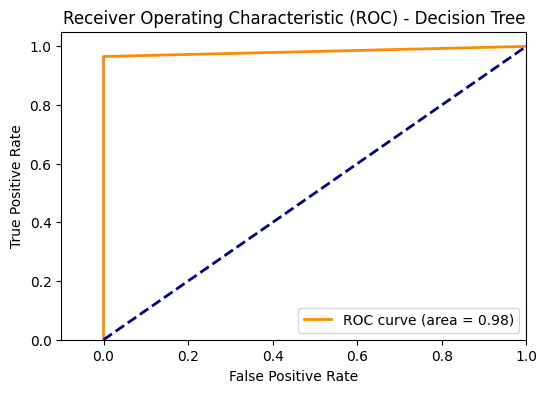

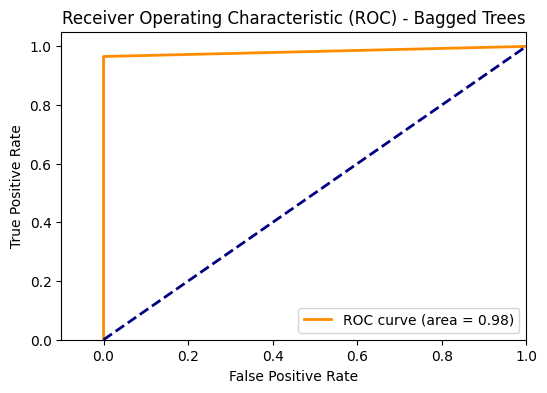

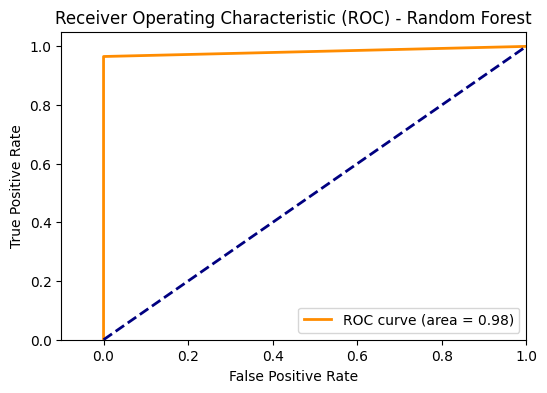

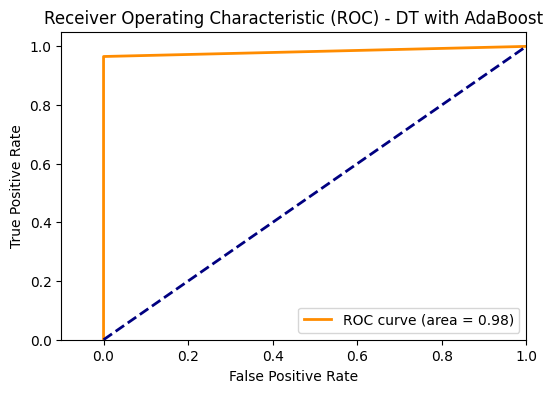

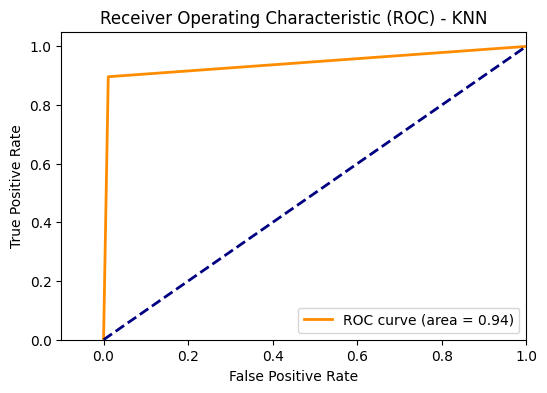

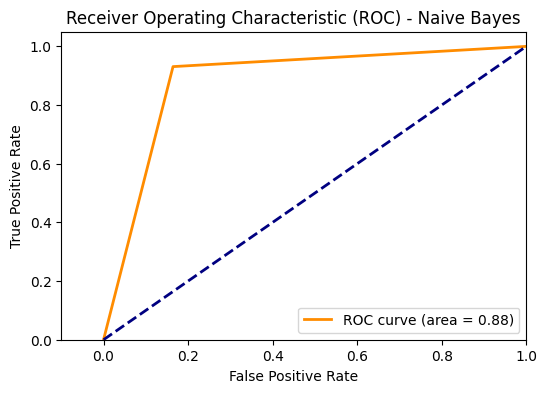

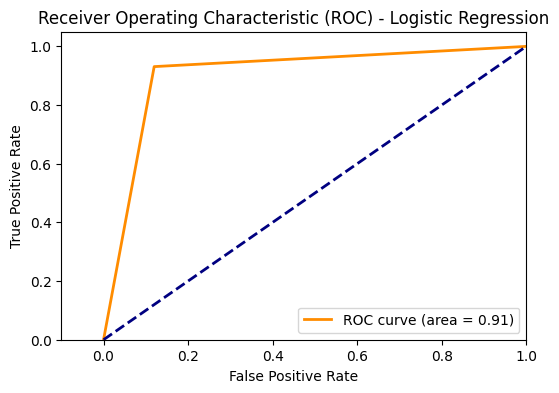

In [ ]:
from sklearn.metrics import roc_curve, auc

# Create a DataFrame to store metrics for each classifier
classifiers = ['ANN', 'SVM', 'Decision Tree', 'Bagged Trees', 'Random Forest', 'DT with AdaBoost', 'KNN', 'Naive Bayes', 'Logistic Regression']
metrics_df = pd.DataFrame(index=classifiers, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

for i, clf in enumerate([mlp_classifier, svm_classifier, dt_classifier, bt_classifier, rf_classifier, adaboost_classifier, knn_classifier, nb_classifier, lr_classifier]):
    clf_name = classifiers[i]

    # Ensure the classifier is fitted
    if hasattr(clf, 'fit'):
        clf.fit(X_train, Y_train)

    Y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    f1 = metrics.f1_score(Y_test, Y_pred)

    # ROC curve
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    roc_auc = auc(fpr, tpr)

    # Store metrics in the DataFrame
    metrics_df.loc[clf_name] = [accuracy, precision, recall, f1, roc_auc]

    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - {}'.format(clf_name))
    plt.legend(loc='lower right')
    plt.show()


# **EVALUATION BAR CHARTS:**

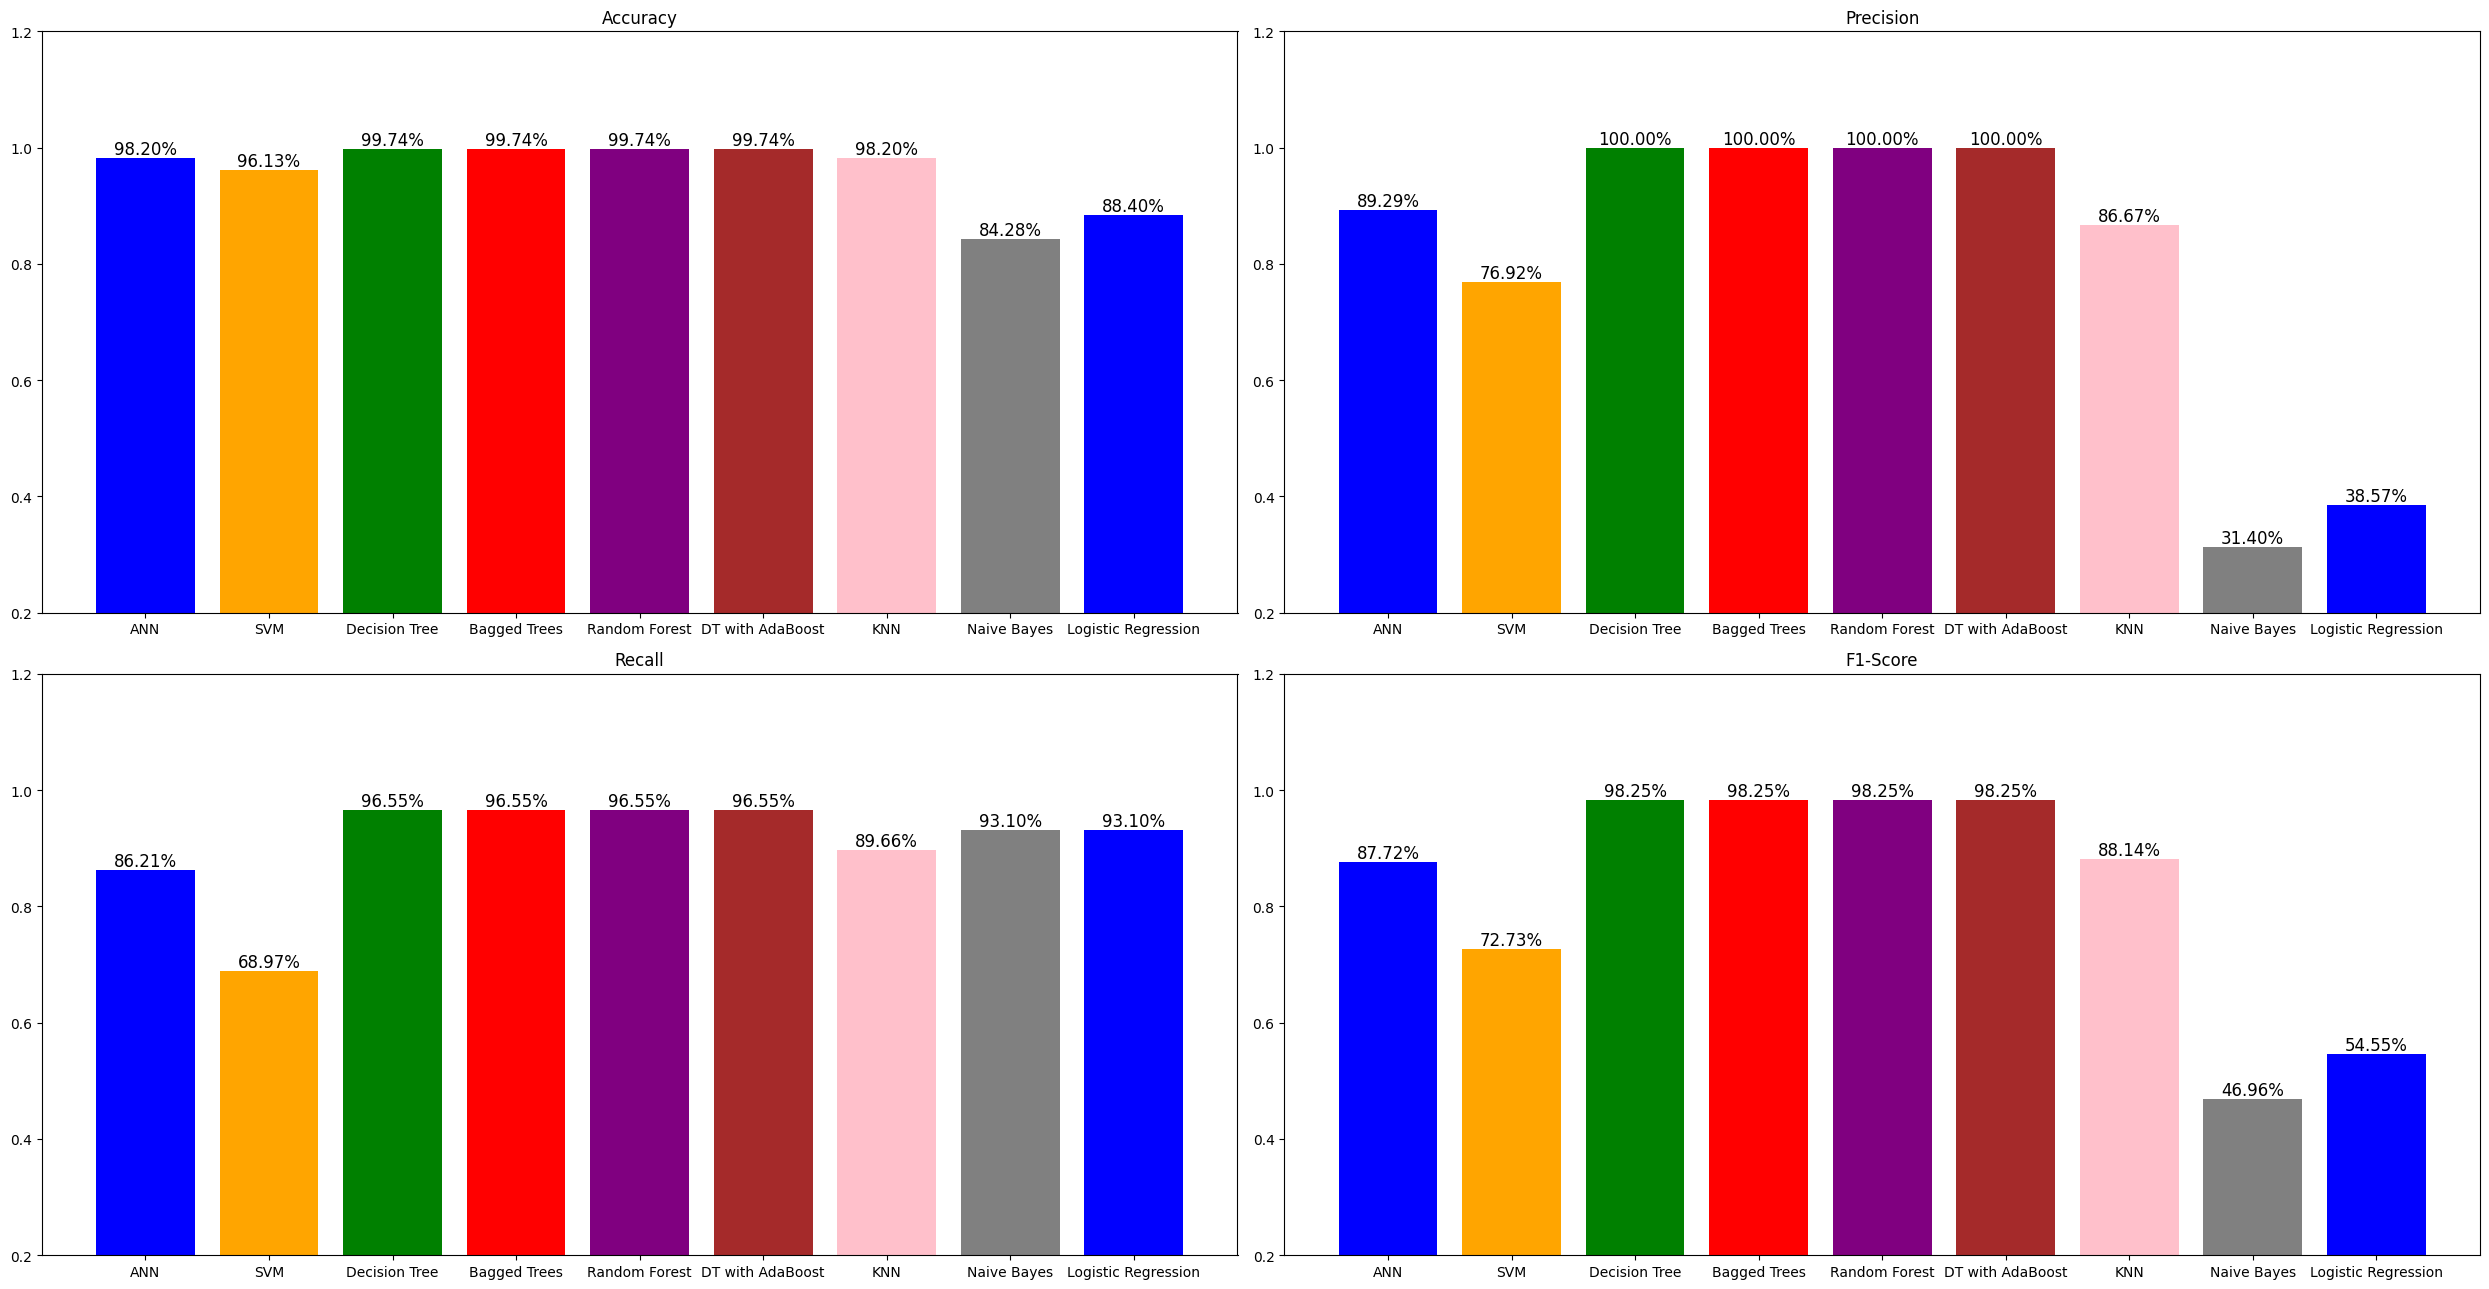

In [ ]:
# Function to add percentage values on top of each bar
def add_percentage_labels(bars, axes):
    for bar in bars:
        height = bar.get_height()
        axes.text(bar.get_x() + bar.get_width() / 2, height,
                  f'{height:.2%}', ha='center', va='bottom', fontsize=12)

# Visualize metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 13))

# Accuracy
accuracy_bars = axes[0, 0].bar(classifiers, metrics_df['Accuracy'], color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0.2, 1.2)  # Adjusted y-axis limits
add_percentage_labels(accuracy_bars, axes[0, 0])

# Precision
precision_bars = axes[0, 1].bar(classifiers, metrics_df['Precision'], color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0.2, 1.2)  # Adjusted y-axis limits
add_percentage_labels(precision_bars, axes[0, 1])

# Recall
recall_bars = axes[1, 0].bar(classifiers, metrics_df['Recall'], color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim(0.2, 1.2)  # Adjusted y-axis limits
add_percentage_labels(recall_bars, axes[1, 0])

# F1-Score
f1_score_bars = axes[1, 1].bar(classifiers, metrics_df['F1-Score'], color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_ylim(0.2, 1.2)  # Adjusted y-axis limits
add_percentage_labels(f1_score_bars, axes[1, 1])

plt.tight_layout()
plt.show()

In [55]:
# Add the "Accuracy After GridSearch" column to the existing DataFrame
formatted_metrics_df['Accuracy After GridSearch'] = [0.9974, 0.9871, 0.9510, 0.9639, 0.9974, 0.9690, 0.9896, 0.9123, 0.9252]

# Print the updated DataFrame
print("\nMetrics for each Classifier:")
print(formatted_metrics_df)



Metrics for each Classifier:
                     Accuracy  Precision  Recall  F1-Score  ROC AUC  \
ANN                      0.98       0.89    0.86      0.88     0.93   
SVM                      0.96       0.77    0.69      0.73     0.84   
Decision Tree            1.00       1.00    0.97      0.98     0.98   
Bagged Trees             1.00       1.00    0.97      0.98     0.98   
Random Forest            1.00       1.00    0.97      0.98     0.98   
DT with AdaBoost         1.00       1.00    0.97      0.98     0.98   
KNN                      0.98       0.87    0.90      0.88     0.94   
Naive Bayes              0.84       0.31    0.93      0.47     0.88   
Logistic Regression      0.88       0.39    0.93      0.55     0.91   

                     Accuracy After GridSearch  
ANN                                     0.9974  
SVM                                     0.9871  
Decision Tree                           0.9510  
Bagged Trees                            0.9639  
Random Forest 